## 使用 tf.keras.datasets 加载数据

In [46]:
import tensorflow as tf

In [47]:
tf.__version__

'2.16.1'

In [48]:
'''
MNIST（Modified National Institute of Standards and Technology）数据集是一个广泛使用的手写数字识别数据集，包含了成千上万的灰度图像和对应的标签。
'''
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [49]:
'''
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)

x_train 和 x_test：包含了数据集的乳香数据，形状为（num_samples, 28, 28)
60000：数据集中的样本数量；28, 28：每个图像的高度和宽度（MNIST图像是28*28的灰度图像）

y_train 和 y_test: 包含了数据集的标签数据，形状为（num_samples,)，这是一个一维数组，包含了与图像对应的类别标签
每个标签从0到9，对应的手写数字类别。
'''
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(type(x_train)) # <class 'numpy.ndarray'>
print(type(y_train)) # <class 'numpy.ndarray'>
# print(y_train) # [5 0 4 ... 5 6 8]
print(type(y_train.take(5))) # <class 'numpy.uint8'>

# 迭代数据集并打印标签值
for y_value in y_train[:5]:
    print(y_value)
    '''
    5
    0
    4
    1
    9
    '''

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.uint8'>
5
0
4
1
9


In [50]:
'''
y_train和y_test数组中的数据被转换成了float32类型。
这通常是为了确保数据类型的一致性，特别是在进行机器学习模型训练时。
大多数深度学习框架，包括TensorFlow和Keras，使用浮点数来进行数值计算，因此将标签数据转换为float32可以提高计算效率和精度。
'''
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Reserve 10,000 samples for validation
'''
验证集划分：代码中从x_train和y_train的末尾各保留了10,000个样本作为验证集（x_val和y_val）。
验证集用于在训练过程中评估模型的性能，以便进行超参数调整和防止过拟合。
通过从训练集的末尾划分样本，而不是随机选择，可以确保数据的分布与训练集保持一致。
'''
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

print(x_train.shape)
print(x_val.shape)

(50000, 28, 28)
(10000, 28, 28)


/var/folders/dt/532r5839127g10v4kyc99xf80000gn/T/ipykernel_2854/1509462114.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # 自动适配子图尺寸
/var/folders/dt/532r5839127g10v4kyc99xf80000gn/T/ipykernel_2854/1509462114.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1) # 绘制前15个手写体数字，以3行5列子图形式展示


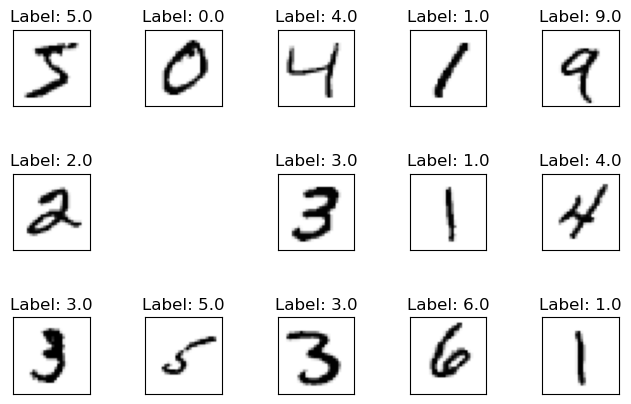

In [51]:
'''
使用%matplotlib inline魔术命令，这告诉matplotlib在Jupyter Notebook中内联显示图表，而不是在新窗口中打开。
'''

%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1) # 绘制前15个手写体数字，以3行5列子图形式展示
    plt.tight_layout() # 自动适配子图尺寸
    plt.imshow(x_train[i], cmap='Greys') # 使用灰色显示像素灰度值
    plt.title("Label: {}".format(y_train[i])) # 设置标签为子图标题
    plt.xticks([]) # 删除x轴标记
    plt.yticks([]) # 删除y轴标记

## 使用 tf.keras 管理 Sequential 模型
### 构建CNN网络模型

In [52]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

/Users/shaoyongzhen/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.summary() # Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
!pip install graphviz pydot
!apt-get install -y graphviz

zsh:1: command not found: apt-get


In [55]:
tf.keras.utils.plot_model(model, 'mnist_model.png')

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [ ]:
'''
optimizer="adam":指定优化器为Adam。
Adam是一种自适应学习率优化算法，它结合了动量（Momentum）和RMSprop两种优化算法的优点。
Adam通常在很多深度学习任务中表现良好，因为它可以根据参数的更新历史自动调整学习率

loss='sparse_categorical_crossentropy':指定损失函数为稀疏分类交叉熵（Sparse Categorical Crossentropy）。
这是一种用于多分类问题的损失函数，它适用于标签为整数索引的情况。
由于MNIST数据集的标签是从0到9的整数，所以使用稀疏分类交叉熵是合适的。

metrics=['accuracy']:指定评估指标列表，这里只包含了准确率（accuracy）。
在训练过程中，除了损失函数外，还会计算这些指标来监控模型的性能。
准确率是分类任务中常用的评估指标，它表示正确预测的数量占总预测数量的比例。
'''
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6950 - loss: 8.1109
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8252 - loss: 0.6673
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8674 - loss: 0.5111
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - accuracy: 0.8855 - loss: 0.4378
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8941 - loss: 0.3936
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8993 - loss: 0.3832
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9067 - loss: 0.3587
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9101 - loss: 0.3517
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9127 - loss: 0.3371
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9171 - loss: 0.3220


In [ ]:
model.evaluate(x_val, y_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9432 - loss: 0.2511


[0.23535063862800598, 0.9466000199317932]

### 保存为 SavedModel 格式模型

In [ ]:
# model.save("mnist_model")
# model.export("mnist_model_ex") # for SavedModel model

# 保存模型为SavedModel格式
tf.saved_model.save(model, "mnist_model_ex")

INFO:tensorflow:Assets written to: mnist_model_ex/assets


INFO:tensorflow:Assets written to: mnist_model_ex/assets


### 加载 SavedModel 格式模型

In [ ]:
# # sm  = tf.keras.models.load_model("mnist_model_ex")
# from tensorflow.keras.losses import SparseCategoricalCrossentropy

# # # 加载SavedModel
# # sm = tf.saved_model.load("mnist_model_ex")

# # # 获取模型的推理签名
# # infer = sm.signatures["serving_default"]

# # # 创建一个Keras模型，并添加一个TFSMLayer层，这个层将使用SavedModel进行推理
# # inputs = tf.keras.Input(shape=(28, 28))
# # outputs = tf.keras.layers.TFSMLayer(
# #         export_dir="mnist_model_ex", 
# #         call_endpoint='serving_default'
# #     )(inputs)
# # model = tf.keras.Model(inputs, outputs)

# # predictions = model.predict(x_val)

# # 使用模型进行预测
# sm = tf.saved_model.load("mnist_model_ex")
# print('load model successfully')

# # 获取模型的签名函数，这取决于你的模型如何构建和保存
# infer = sm.signatures['serving_default']

# # 计算损失函数，这里使用SparseCategoricalCrossentropy
# loss_fn = SparseCategoricalCrossentropy(from_logits=True)
# loss = loss_fn(y_val, predictions)

# # 计算准确率，这里假设模型的输出是logits
# # 如果模型的输出是probabilities，你需要先通过argmax获取预测标签
# predicted_labels = tf.argmax(predictions, axis=1)
# accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, y_val), tf.float32))

# # 打印评估结果
# print('Loss:', loss, ' Accuracy:', accuracy)


loaded_model = tf.saved_model.load('mnist_model_ex')
print("Model loaded successfully.")
# 打印模型的所有可用签名
for key in loaded_model.signatures.keys():
    print(key) #serving_default


# 获取模型的签名函数，这取决于你的模型如何构建和保存
infer = loaded_model.signatures['serving_default']
print(infer)
print(type(x_val)) #<class 'numpy.ndarray'>

# # 准备输入数据，确保数据形状和类型与模型期望的匹配
# # 假设输入数据是一个 NumPy 数组
# import numpy as np
# input_data = np.random.random([1, input_shape_here]).astype(np.float32)  # 替换 'input_shape_here' 为适当的形状

# # 创建一个 Tensor 输入
# input_tensor = tf.convert_to_tensor(input_data)

# 进行预测
input_tensor = tf.convert_to_tensor(x_val, dtype=tf.float32)
print(type(input_tensor)) #<class 'tensorflow.python.framework.ops.EagerTensor'>
output = infer(input_tensor)

# 输出预测结果
'''
{'output_0': <tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[1.4493111e-33, 9.7853492e-10, 2.5904589e-16, ..., 1.9675204e-13,
        1.1829113e-18, 6.6520488e-21],
'''
print(output)
print(type(output)) # <class 'dict'>
for key in output:
    print(key, type(output[key])) # output_0 <class 'tensorflow.python.framework.ops.EagerTensor'>

Model loaded successfully.
serving_default
ConcreteFunction Input Parameters:
  inputs (KEYWORD_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='inputs')
Output Type:
  Dict[['output_0', TensorSpec(shape=(None, 10), dtype=tf.float32, name='output_0')]]
Captures:
  5411447456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5411447632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5411448688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5411447280: TensorSpec(shape=(), dtype=tf.resource, name=None)
<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
{'output_0': <tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[1.4493111e-33, 9.7853492e-10, 2.5904589e-16, ..., 1.9675204e-13,
        1.1829113e-18, 6.6520488e-21],
       [2.1203905e-12, 4.5689070e-04, 6.8529230e-04, ..., 4.1800521e-10,
        9.9752772e-01, 7.2221387e-06],
       [2.3219896e-11, 0.0000000e+00, 1.0458407e-18, ..., 3.7469470e-31,
        8.6370072e-21

In [ ]:
# loaded_model.evaluate(x_val, y_val)
# 假设 x_test 是输入数据，y_test 是标签
# predictions = []
# for x in x_val:
#     # 确保输入数据形状和类型匹配模型的期望
#     x_tensor = tf.convert_to_tensor([x], dtype=tf.float32)
#     result = infer(x_tensor)
#     predictions.append(result['output_0'])  # 根据模型的输出键调整
    

# 计算准确率等指标
from sklearn.metrics import accuracy_score
import numpy as np
infer_outputs = output['output_0']
# 假设 predictions 需要处理成与 y_test 相同的形状和格式
predictions = np.argmax(infer_outputs, axis=1)
accuracy = accuracy_score(y_val, predictions)
print("Test Accuracy:", accuracy) # Test Accuracy: 0.9466

# loss
from tensorflow.keras.losses import SparseCategoricalCrossentropy
loss_function = SparseCategoricalCrossentropy()
# Assuming your model outputs log probabilities, convert them to probabilities
loss = loss_function(y_val, infer_outputs).numpy()
print("Test Loss:", loss) # Loss: 0.22313344


Test Accuracy: 0.9466
Loss: 0.22313344


### 保存为 HDF5 格式模型

In [ ]:
model.save("mnist_model.h5")

### 加载 HDF5 格式模型

In [ ]:
hm = tf.keras.models.load_model("mnist_model.h5")

In [ ]:
hm.evaluate(x_val, y_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9426 - loss: 0.2856


[0.26053038239479065, 0.9485999941825867]

## 使用 tf.keras 管理 functional API

In [ ]:
# For easy reset of notebook state.
tf.keras.backend.clear_session() 

#### 使用 tf.keras.Input 定义模型输入

In [ ]:
inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten(input_shape=(28, 28))(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10)(x)

/Users/shaoyongzhen/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [ ]:
model.summary() #Model: "mnist_model"

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!pip install graphviz pydot
!apt-get install -y graphviz

: 

In [ ]:
tf.keras.utils.plot_model(model, model.name+'.png')

: 

In [ ]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.1357 - loss: 5.3943
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1111 - loss: 2.3404
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1024 - loss: 2.3324
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0897 - loss: 2.3095
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0964 - loss: 2.3330


In [ ]:
model.evaluate(x_val, y_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0942 - loss: 2.3026


[2.30259108543396, 0.09489999711513519]

### 模型保存和加载：functional API 与 Sequential 完全兼容